In [5]:
import csv

with open('trip_data_3.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader)
    print(headers)
    


['medallion', ' hack_license', ' vendor_id', ' rate_code', ' store_and_fwd_flag', ' pickup_datetime', ' dropoff_datetime', ' passenger_count', ' trip_time_in_secs', ' trip_distance', ' pickup_longitude', ' pickup_latitude', ' dropoff_longitude', ' dropoff_latitude'] 



In [38]:
import csv
import datetime
from prettytable import PrettyTable

# initialize datetime variables
earliest_pickup_time = datetime.datetime.max
latest_pickup_time = datetime.datetime.min
earliest_dropoff_time = datetime.datetime.max
latest_dropoff_time = datetime.datetime.min

# initialize row counter
num_rows = 0

# open CSV file
with open('trip_data_3.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    
    # loop through rows
    for row in reader:
        # skip header row
        if reader.line_num == 1:
            continue
        
        # update pickup time range
        pickup_time = datetime.datetime.strptime(row[5], '%Y-%m-%d %H:%M:%S')
        if pickup_time < earliest_pickup_time:
            earliest_pickup_time = pickup_time
        if pickup_time > latest_pickup_time:
            latest_pickup_time = pickup_time
            
        # update dropoff time range
        dropoff_time = datetime.datetime.strptime(row[6], '%Y-%m-%d %H:%M:%S')
        if dropoff_time < earliest_dropoff_time:
            earliest_dropoff_time = dropoff_time
        if dropoff_time > latest_dropoff_time:
            latest_dropoff_time = dropoff_time
            
        # increment row counter
        num_rows += 1

# create table
table = PrettyTable()
table.field_names = ["Datetime Range", "Number of Rows"]

# add rows to table
table.add_row([f"Pickup: {earliest_pickup_time} - {latest_pickup_time}", num_rows])
table.add_row([f"Dropoff: {earliest_dropoff_time} - {latest_dropoff_time}", ""])

# print table
print(table)


+----------------------------------------------------+----------------+
|                   Datetime Range                   | Number of Rows |
+----------------------------------------------------+----------------+
| Pickup: 2013-03-01 00:00:00 - 2013-03-31 23:59:58  |    15749228    |
| Dropoff: 2013-03-01 00:00:39 - 2013-04-01 01:16:32 |                |
+----------------------------------------------------+----------------+


In [2]:
import csv
from prettytable import PrettyTable

# initialize table and field names
table = PrettyTable()
field_names = ['Field Name', 'Description']

# dictionary with descriptions for each field
field_desc = {
    'medallion': 'A unique identifier for the taxi cab.',
    'hack_license': 'A unique identifier for the taxi driver.',
    'vendor_id': 'A code indicating the taxi vendor.',
    'rate_code': 'The rate code for the trip.',
    'store_and_fwd_flag': 'A flag indicating whether the trip data was stored in the vehicle before sending to the server.',
    'pickup_datetime': 'The date and time when the passenger was picked up.',
    'dropoff_datetime': 'The date and time when the passenger was dropped off.',
    'passenger_count': 'The number of passengers on the trip.',
    'trip_time_in_secs': 'The length of the trip in seconds.',
    'trip_distance': 'The distance of the trip in miles.',
    'pickup_longitude': 'The longitude of the pickup location.',
    'pickup_latitude': 'The latitude of the pickup location.',
    'dropoff_longitude': 'The longitude of the dropoff location.',
    'dropoff_latitude': 'The latitude of the dropoff location.'
}

# add rows to the table
for field, desc in field_desc.items():
    table.add_row([field, desc])

# set the width of each column
table.field_names = field_names
table.align['Description'] = 'l'
table.max_width['Description'] = 100
print(table)


+--------------------+-------------------------------------------------------------------------------------------------+
|     Field Name     | Description                                                                                     |
+--------------------+-------------------------------------------------------------------------------------------------+
|     medallion      | A unique identifier for the taxi cab.                                                           |
|    hack_license    | A unique identifier for the taxi driver.                                                        |
|     vendor_id      | A code indicating the taxi vendor.                                                              |
|     rate_code      | The rate code for the trip.                                                                     |
| store_and_fwd_flag | A flag indicating whether the trip data was stored in the vehicle before sending to the server. |
|  pickup_datetime   | The date 

In [4]:
import csv
from collections import defaultdict
from prettytable import PrettyTable

# open CSV file and read the rows of data
unique_values = defaultdict(set)
with open('trip_data_3.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader)  # read the first row, which contains headers

    for row in reader:
        for i, value in enumerate(row):
            unique_values[headers[i]].add(value)

        if all(len(values) >= 5 for values in unique_values.values()):
            break

# initialize table and set field names
table = PrettyTable()
table.field_names = ['Field Name', 'Unique Values']

# add unique values to the table
for field_name, values in unique_values.items():
    table.add_row([field_name, ', '.join(list(values)[:5])])

# print table
print(table)


+---------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|      Field Name     |                                                                              Unique Values                                                                               |
+---------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|      medallion      | 0E0569377FEAE2A65216459409656B05, 8097F829A0EB7C9942A6F88CE72C9FC8, 9D00F31E2C114E3699A745BC9E7BFCE9, 8023EE69180B81C6AE6C178FEB0CAB97, A42B8DAE936D48E739295950E29F3169 |
|     hack_license    | 11584E83BA244D9F682B2529327C39B2, D79250287478EC80548375003AC3A295, 76BFB84E8CE9800646761D5517EB0E4E, D9F9E3A6B5E27C549234BA2FC8D7B594, 574E7279BEF53CFAA1C175788F68363D |
|       vendor_id     |  

In [12]:
import csv
from folium import Map, Marker
import os
import time
from selenium import webdriver
import prettytable as pt

filtered_data = []

# Set the valid range for latitude and longitude coordinates
min_lat, max_lat = 40.5, 40.9
min_lon, max_lon = -74.25, -73.7

with open('trip_data_3.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader)  # read the first row, which contains headers
    filtered_data.append(headers)

    for row in reader:
        pickup_lat = row[headers.index(' pickup_latitude')]
        pickup_lon = row[headers.index(' pickup_longitude')]
        dropoff_lat = row[headers.index(' dropoff_latitude')]
        dropoff_lon = row[headers.index(' dropoff_longitude')]

        # Skip the row with empty values
        if not (pickup_lat and pickup_lon and dropoff_lat and dropoff_lon):
            continue

        # Check if the coordinates are within the valid range
        pickup_lat = float(pickup_lat)
        pickup_lon = float(pickup_lon)
        dropoff_lat = float(dropoff_lat)
        dropoff_lon = float(dropoff_lon)

        if (min_lat <= pickup_lat <= max_lat and
            min_lon <= pickup_lon <= max_lon and
            min_lat <= dropoff_lat <= max_lat and
            min_lon <= dropoff_lon <= max_lon):
            filtered_data.append(row)

if len(filtered_data) > 1:
    min_lat = min(float(row[headers.index(' pickup_latitude')]) for row in filtered_data[1:])
    max_lat = max(float(row[headers.index(' pickup_latitude')]) for row in filtered_data[1:])
    min_lon = min(float(row[headers.index(' pickup_longitude')]) for row in filtered_data[1:])
    max_lon = max(float(row[headers.index(' pickup_longitude')]) for row in filtered_data[1:])
    
    # Create a table for the geographic range
    t = pt.PrettyTable(['Coordinate', 'Min', 'Max'])
    t.add_row(['Latitude', min_lat, max_lat])
    t.add_row(['Longitude', min_lon, max_lon])
    print(t)

    center_lat = (min_lat + max_lat) / 2
    center_lon = (min_lon + max_lon) / 2

    m = Map(location=[center_lat, center_lon], zoom_start=11)

    # Add markers for each corner of the range
    Marker([min_lat, min_lon], tooltip="Min Lat / Min Lon").add_to(m)
    Marker([min_lat, max_lon], tooltip="Min Lat / Max Lon").add_to(m)
    Marker([max_lat, min_lon], tooltip="Max Lat / Min Lon").add_to(m)
    Marker([max_lat, max_lon], tooltip="Max Lat / Max Lon").add_to(m)

    m.save("map.html")

else:
    print("No valid coordinates found within the specified range.")

display(m)

map_filename = 'map.html'
m.save(map_filename)

# Convert the HTML map to a PNG image
img_filename = 'map.png'

# Set up the browser driver (Chrome or Firefox)
driver = webdriver.Chrome()  # Or use webdriver.Firefox() for Firefox

# Open the HTML file in the browser and save a screenshot
driver.get(f'file://{os.path.abspath(map_filename)}')
time.sleep(2)  # Wait for the map to load
driver.save_screenshot(img_filename)
driver.quit()

# Remove the temporary
os.remove(map_filename)


+------------+----------+------------+
| Coordinate |   Min    |    Max     |
+------------+----------+------------+
|  Latitude  | 40.50053 | 40.899963  |
| Longitude  |  -74.25  | -73.700111 |
+------------+----------+------------+


In [7]:
import csv
import matplotlib.pyplot as plt
import math
import numpy as np
from datetime import datetime

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c

    return distance

total_distance = 0
trip_count = 0
trip_data_by_passenger_count = {i: [] for i in range(0, 7)}
# Initialize dictionaries to store the sum of distances and counts for each week
week_data = {i: {'distance_sum': 0, 'count': 0} for i in range(1, 5)}

with open('trip_data_3.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    for row in reader:
        try:
            pickup_lat = float(row[' pickup_latitude'])
            pickup_lon = float(row[' pickup_longitude'])
            dropoff_lat = float(row[' dropoff_latitude'])
            dropoff_lon = float(row[' dropoff_longitude'])
            pickup_datetime_obj = datetime.strptime(row[' pickup_datetime'], '%Y-%m-%d %H:%M:%S')
            day_of_month = pickup_datetime_obj.day

            week_of_month = (day_of_month - 1) // 7 + 1
            if week_of_month > 4:
                continue

            distance = haversine(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
            week_data[week_of_month]['distance_sum'] += distance
            week_data[week_of_month]['count'] += 1
            total_distance += distance
            trip_count += 1
            passenger_count = int(row[' passenger_count'])
            trip_data_by_passenger_count[passenger_count].append(distance)
        except ValueError:
            continue

# Plot the total trip distance by weeks of the month
fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)

weeks = list(week_data.keys())
total_distances = [data['distance_sum'] for week, data in week_data.items()]
ax.bar(weeks, total_distances)

ax.set_xlabel('Week of the Month')
ax.set_ylabel('Total Trip Distance (km)')
ax.set_title('Total Trip Distance by Weeks of the Month')
plt.xticks(weeks)

plt.show()
plt.savefig('total_trip_distance_by_week.png')


KeyError: 9

In [3]:
import csv
from collections import defaultdict
from prettytable import PrettyTable

def find_distinct_values(csv_file):
    distinct_values = defaultdict(set)

    with open(csv_file, newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)

        for row in reader:
            for i, value in enumerate(row):
                distinct_values[headers[i]].add(value)

    return distinct_values

def print_distinct_values_table(distinct_values):
    table = PrettyTable()
    table.field_names = ['Field', 'Distinct Values']

    for field, values in distinct_values.items():
        row_data = ', '.join(sorted(values)[:10]) + ('...' if len(values) > 10 else '')
        table.add_row([field, row_data])

    print(table)

csv_file = 'trip_data_3.csv'
distinct_values = find_distinct_values(csv_file)
print_distinct_values_table(distinct_values)


+---------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|        Field        |                                                                                                                                                                    Distinct Values                                                                                                                                                                    |
+---------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
import csv
from prettytable import PrettyTable

def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def find_min_max_values(csv_file):
    min_values = {}
    max_values = {}

    excluded_fields = {' pickup_latitude', ' pickup_longitude', ' dropoff_latitude', ' dropoff_longitude'}

    with open(csv_file, newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)

        for header in headers:
            if header not in excluded_fields:
                min_values[header] = float('inf')
                max_values[header] = float('-inf')

        for row in reader:
            for i, value in enumerate(row):
                header = headers[i]
                if header in excluded_fields or value == '':
                    continue

                if is_float(value):
                    value = float(value)
                    if value < min_values[header]:
                        min_values[header] = value
                    if value > max_values[header]:
                        max_values[header] = value

    return min_values, max_values

def print_min_max_table(min_values, max_values):
    table = PrettyTable()
    table.field_names = ["Field", "Min Value", "Max Value"]

    for field in min_values.keys():
        if min_values[field] != float('inf') and max_values[field] != float('-inf'):
            table.add_row([field, min_values[field], max_values[field]])

    print(table)

csv_file = 'trip_data_3.csv'
min_values, max_values = find_min_max_values(csv_file)
print_min_max_table(min_values, max_values)


+--------------------+------------+-----------+
|       Field        | Min Value  | Max Value |
+--------------------+------------+-----------+
|      rate_code     |    0.0     |   210.0   |
|   passenger_count  |    0.0     |   255.0   |
|  trip_time_in_secs |    0.0     |  10800.0  |
|    trip_distance   |    0.0     |   100.0   |
|  pickup_longitude  | -2316.6365 | 2945.9587 |
|   pickup_latitude  | -3124.4897 | 3210.3855 |
|  dropoff_longitude |  -2491.22  | 1347.4437 |
|  dropoff_latitude  | -3547.8972 | 3453.3174 |
+--------------------+------------+-----------+


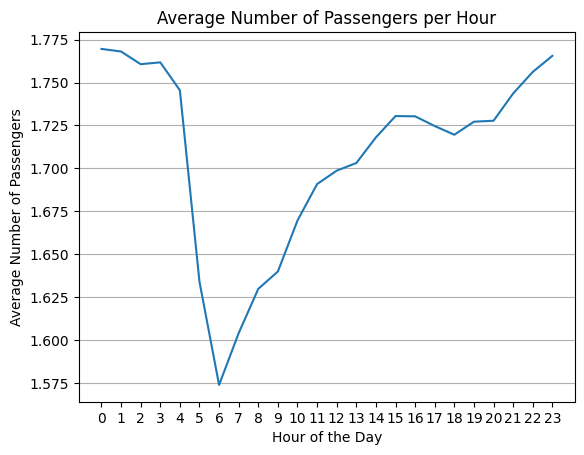

<Figure size 640x480 with 0 Axes>

In [21]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

def calculate_average_passengers_per_hour(csv_file):
    passengers_per_hour = [0] * 24
    trips_per_hour = [0] * 24

    with open(csv_file, newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)

        pickup_datetime_idx = headers.index(' pickup_datetime')
        passenger_count_idx = headers.index(' passenger_count')

        for row in reader:
            pickup_datetime = row[pickup_datetime_idx]
            passenger_count = row[passenger_count_idx]

            if pickup_datetime and passenger_count:
                try:
                    pickup_datetime_obj = datetime.strptime(pickup_datetime, '%Y-%m-%d %H:%M:%S')
                    hour = pickup_datetime_obj.hour
                    passengers_per_hour[hour] += int(passenger_count)
                    trips_per_hour[hour] += 1
                except ValueError:
                    continue

    average_passengers_per_hour = [passengers / trips if trips > 0 else 0 for passengers, trips in zip(passengers_per_hour, trips_per_hour)]
    return average_passengers_per_hour

def plot_average_passengers_per_hour(average_passengers_per_hour):
    plt.plot(range(24), average_passengers_per_hour)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Number of Passengers')
    plt.title('Average Number of Passengers per Hour')
    plt.xticks(range(24))
    plt.grid(axis='y')
    plt.show()
    plt.savefig('chart1.png')


csv_file = 'trip_data_3.csv'
average_passengers_per_hour = calculate_average_passengers_per_hour(csv_file)
plot_average_passengers_per_hour(average_passengers_per_hour)


In [6]:
import csv
from prettytable import PrettyTable

input_file = 'trip_data_3.csv'
output_file = 'new.csv'
sample_rate = 1000  # Keep every 1000th row

with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    headers = next(reader)
    writer.writerow(headers)  # Write the header row to the output file

    row_count = 0
    sample_data = []
    for i, row in enumerate(reader):
        if i % sample_rate == 0:
            writer.writerow(row)
            sample_data.append(row)
        row_count += 1

print(f"Total rows in the original file: {row_count}")
print(f"Rows in the new file: {row_count // sample_rate}")

# Display sample data in vertical table format using PrettyTable
table = PrettyTable()
header = 'pickup_datetime'  # Choose which column to display
table.add_column(header, [row[headers.index(header)] for row in sample_data])
print(f"{header} data:")
print(table.get_string())



Total rows in the original file: 15749228
Rows in the new file: 15749


ValueError: 'pickup_datetime' is not in list

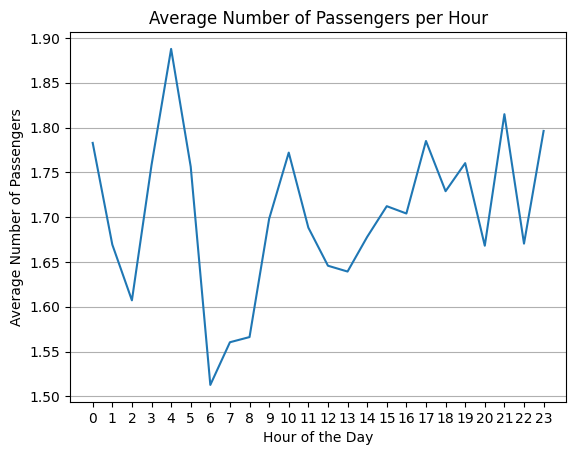

<Figure size 640x480 with 0 Axes>

In [23]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

def calculate_average_passengers_per_hour(csv_file):
    passengers_per_hour = [0] * 24
    trips_per_hour = [0] * 24

    with open(csv_file, newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)

        pickup_datetime_idx = headers.index(' pickup_datetime')
        passenger_count_idx = headers.index(' passenger_count')

        for row in reader:
            pickup_datetime = row[pickup_datetime_idx]
            passenger_count = row[passenger_count_idx]

            if pickup_datetime and passenger_count:
                try:
                    pickup_datetime_obj = datetime.strptime(pickup_datetime, '%Y-%m-%d %H:%M:%S')
                    hour = pickup_datetime_obj.hour
                    passengers_per_hour[hour] += int(passenger_count)
                    trips_per_hour[hour] += 1
                except ValueError:
                    continue

    average_passengers_per_hour = [passengers / trips if trips > 0 else 0 for passengers, trips in zip(passengers_per_hour, trips_per_hour)]
    return average_passengers_per_hour

def plot_average_passengers_per_hour(average_passengers_per_hour):
    plt.plot(range(24), average_passengers_per_hour)
    plt.xlabel('Hour of the Day')
    plt.ylabel('Average Number of Passengers')
    plt.title('Average Number of Passengers per Hour')
    plt.xticks(range(24))
    plt.grid(axis='y')
    plt.show()
    plt.savefig('chart2.png')


csv_file = 'new.csv'
average_passengers_per_hour = calculate_average_passengers_per_hour(csv_file)
plot_average_passengers_per_hour(average_passengers_per_hour)

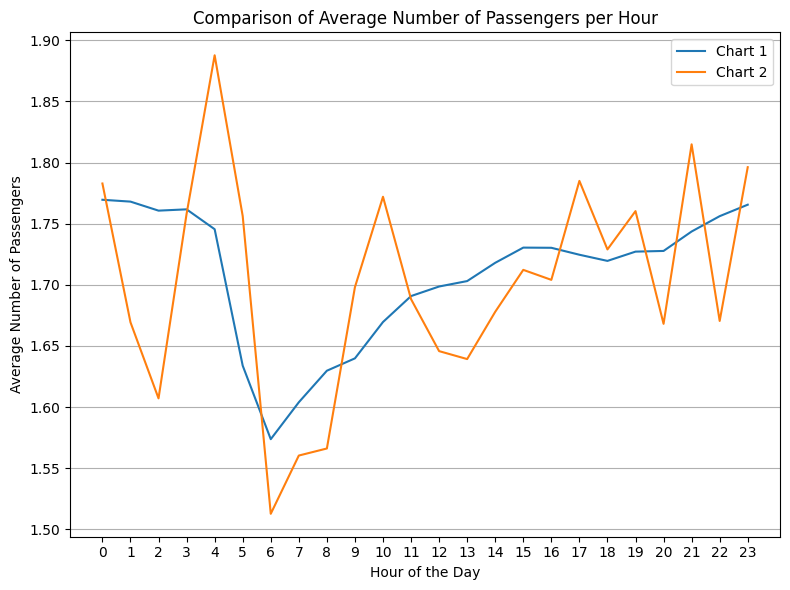

<Figure size 640x480 with 0 Axes>

In [24]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt

def calculate_average_passengers_per_hour(csv_file):
    passengers_per_hour = [0] * 24
    trips_per_hour = [0] * 24

    with open(csv_file, newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)

        pickup_datetime_idx = headers.index(' pickup_datetime')
        passenger_count_idx = headers.index(' passenger_count')

        for row in reader:
            pickup_datetime = row[pickup_datetime_idx]
            passenger_count = row[passenger_count_idx]

            if pickup_datetime and passenger_count:
                try:
                    pickup_datetime_obj = datetime.strptime(pickup_datetime, '%Y-%m-%d %H:%M:%S')
                    hour = pickup_datetime_obj.hour
                    passengers_per_hour[hour] += int(passenger_count)
                    trips_per_hour[hour] += 1
                except ValueError:
                    continue

    average_passengers_per_hour = [passengers / trips if trips > 0 else 0 for passengers, trips in zip(passengers_per_hour, trips_per_hour)]
    return average_passengers_per_hour

def plot_average_passengers_per_hour(average_passengers_per_hour_1, average_passengers_per_hour_2):
    fig, axs = plt.subplots(figsize=(8, 6), tight_layout=True)
    axs.plot(range(24), average_passengers_per_hour_1, label='Chart 1')
    axs.plot(range(24), average_passengers_per_hour_2, label='Chart 2')
    axs.set_xlabel('Hour of the Day')
    axs.set_ylabel('Average Number of Passengers')
    axs.set_title('Comparison of Average Number of Passengers per Hour')
    axs.set_xticks(range(24))
    axs.grid(axis='y')
    axs.legend()
    plt.show()
    plt.savefig('chart_comparison.png')


csv_file_1 = 'trip_data_3.csv'
average_passengers_per_hour_1 = calculate_average_passengers_per_hour(csv_file_1)

csv_file_2 = 'new.csv'
average_passengers_per_hour_2 = calculate_average_passengers_per_hour(csv_file_2)

plot_average_passengers_per_hour(average_passengers_per_hour_1, average_passengers_per_hour_2)
